In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("C:\\Users\\thp029\\ct16_cap1_ds7\\project_2\\data\\ad_placement\\census-income.csv")

In [4]:
a=data.duplicated()

In [5]:
len([i for i in a.index if a[i]==True])

905

In [6]:
data1=data.drop_duplicates(keep='first').reset_index(drop=True)

In [7]:
check=data1.drop('target',axis=1)
check

age                     worker_class  detailed_ind_cd  detailed_occ_cd  \
0       23                          Private                6               38   
1       45                          Private               33               19   
2       11                  Not in universe                0                0   
3        4                  Not in universe                0                0   
4       68                          Private               27               35   
5        5                  Not in universe                0                0   
6       54                          Private               33               19   
7       64                          Private               35               17   
8        9                  Not in universe                0                0   
9       40                          Private               43               23   
10      65   Self-employed-not incorporated               44               32   
11      50   Self-employed-not incorporated               45               12   
12      19               Federal government               33               41   
13      32                          Private               35               31   
14      12                  Not in universe                0                0   
15      23                          Private               29               42   
16      33                          Private               34               22   
17      56                  Not in universe                0                0   
18      48                 State government               50                3   
19      32                          Private               42               16   
20      21                  Not in universe                0                0   
21      11                  Not in universe                0                0   
22      57                          Private               37                5   
23      88                  Not in universe                0                0   
24      46                          Private                9               38   
25      39                          Private               41                8   
26      15                  Not in universe                0                0   
27      16                          Private               36               27   
28      15                  Not in universe                0                0   
29      70                  Not in universe                0                0   
...    ...                              ...              ...              ...   
99513   17                          Private               33               29   
99514   29                  Not in universe                0                0   
99515   24                 State government               43               10   
99516   15                  Not in universe                0                0   
99517   36                          Private               33               26   
99518   59                  Not in universe                0                0   
99519   80                  Not in universe                0                0   
99520    0                  Not in universe                0                0   
99521   53                          Private               30               42   
99522    5                  Not in universe                0                0   
99523    4                  Not in universe                0                0   
99524   38                  Not in universe                0                0   
99525   50       Self-employed-incorporated               33                8   
99526   69                  Not in universe                0                0   
99527    7                  Not in universe                0                0   
99528   19                  Not in universe                0                0   
99529   17                  Not in universe                0                0   
99530   26                          Pr

In [8]:
check1=check.duplicated()
conflict=[i for i in check1.index if check1[i]==True]
conflict

[]

In [9]:
check=data1.drop(['year','target'],axis=1)
check1=check.duplicated()
conflict=[i for i in check1.index if check1[i]==True]
conflict

[]

In [10]:
data1['target'].value_counts()

-50000      93302
 50000+.     6241
Name: target, dtype: int64

In [55]:
6241.0/(6241+93302)

0.0626965231106155

In [11]:
data1['target']=data1['target'].replace('-50000',0)
data1['target']=data1['target'].replace(' 50000+.',1)
data1['target'].value_counts()

0    93302
1     6241
Name: target, dtype: int64

In [57]:
target_trend={}
for cols in data1.columns.values[:-1]:
    if data1[cols].dtypes != np.float64:
        tmp=pd.DataFrame(data1.groupby([cols])[data1.columns.values[-1]].mean())
        target_trend[cols]=tmp

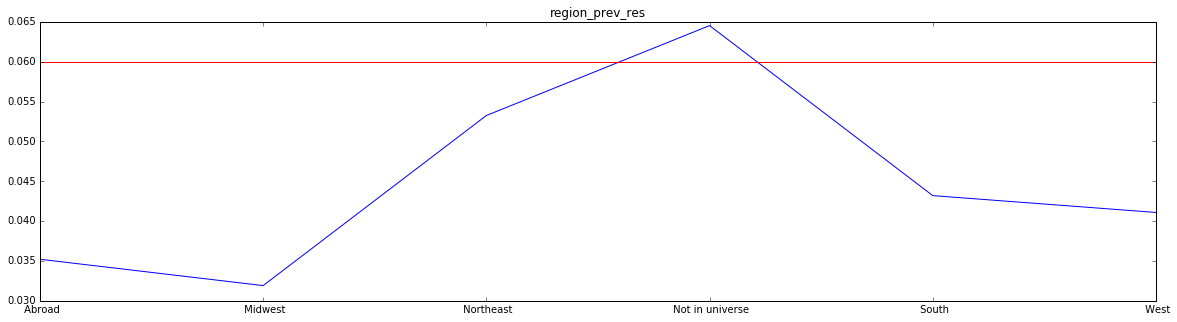

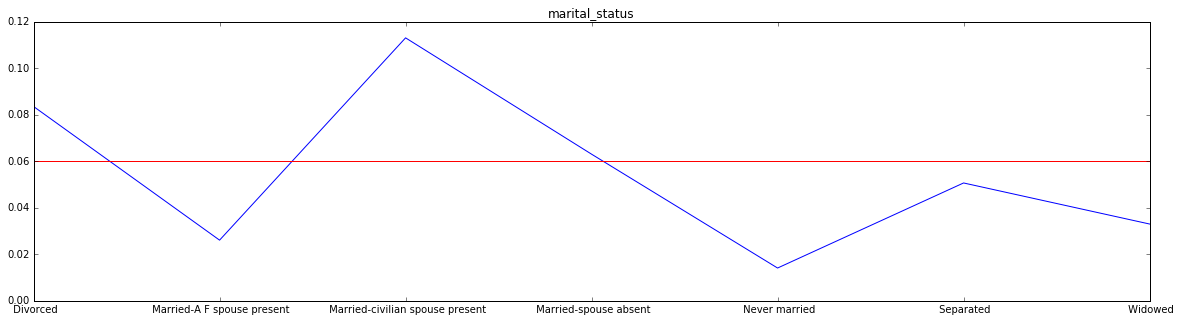

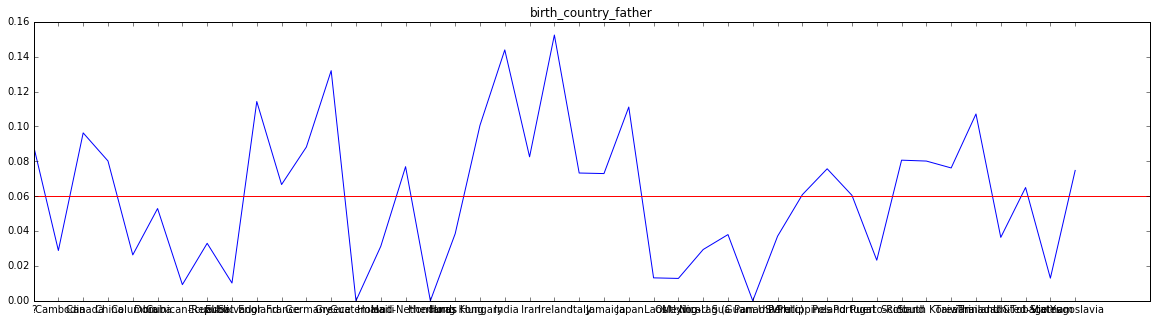

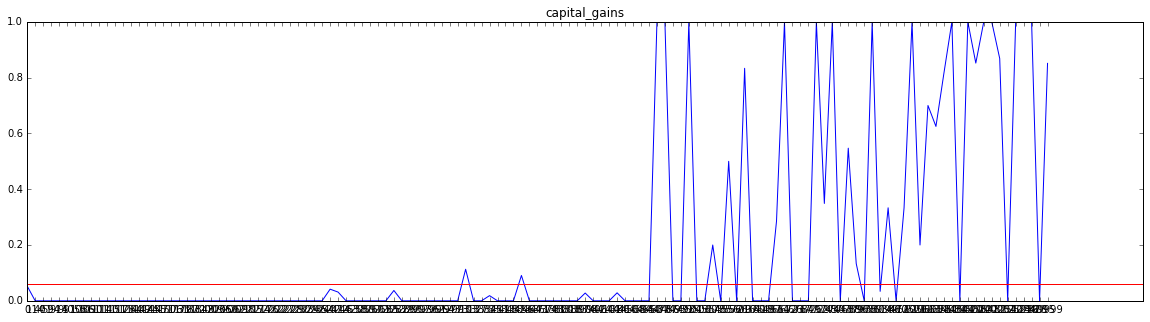

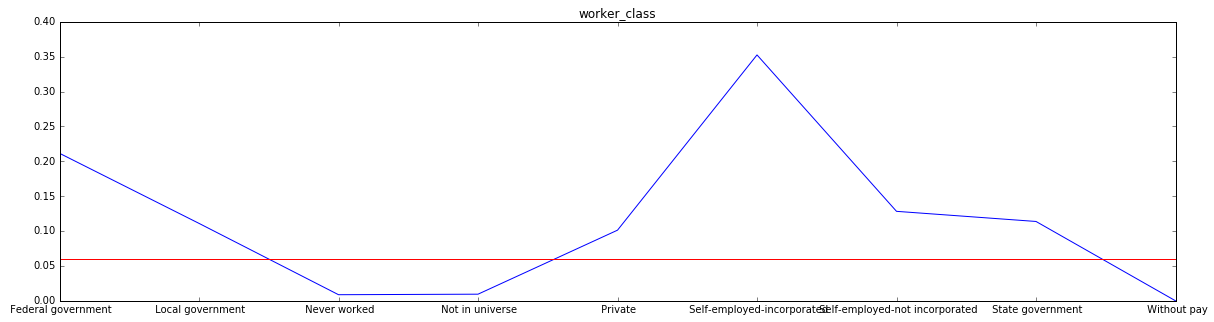

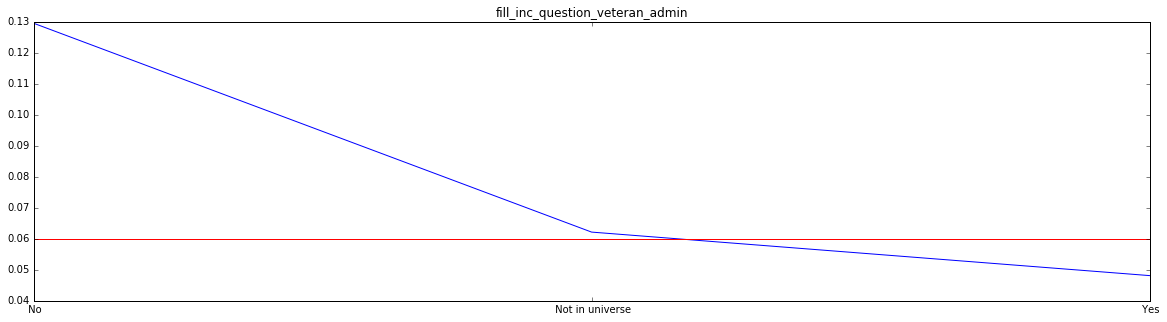

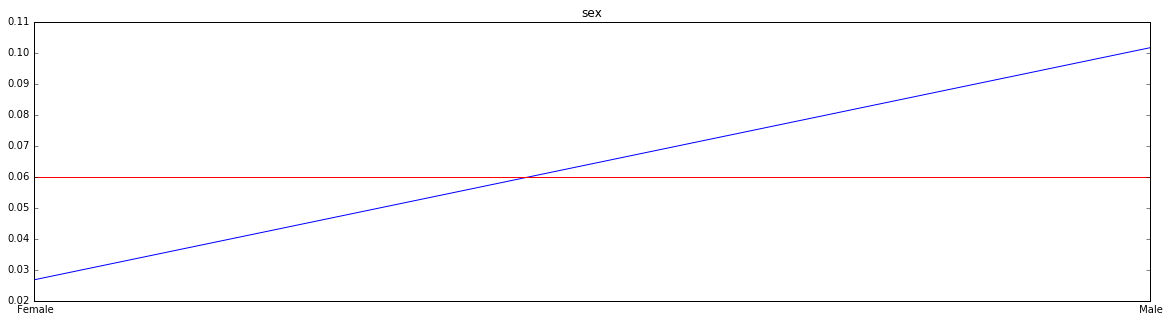

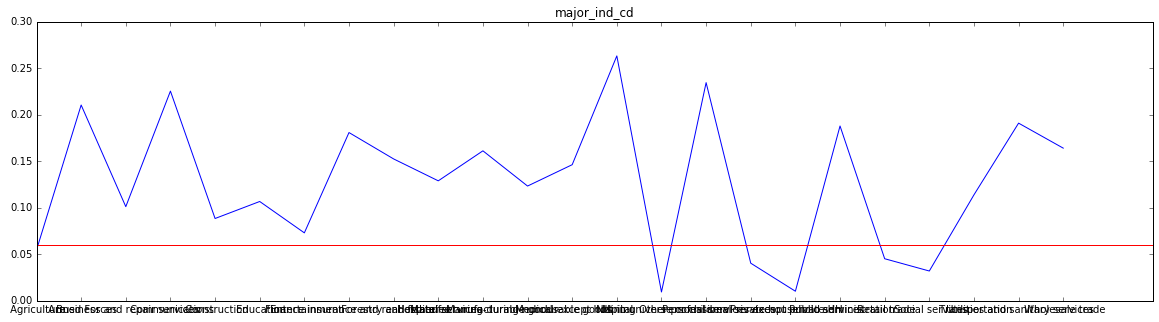

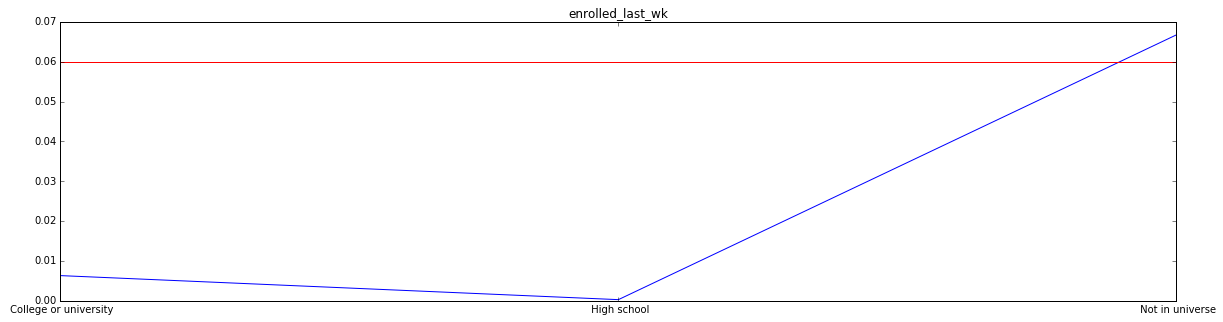

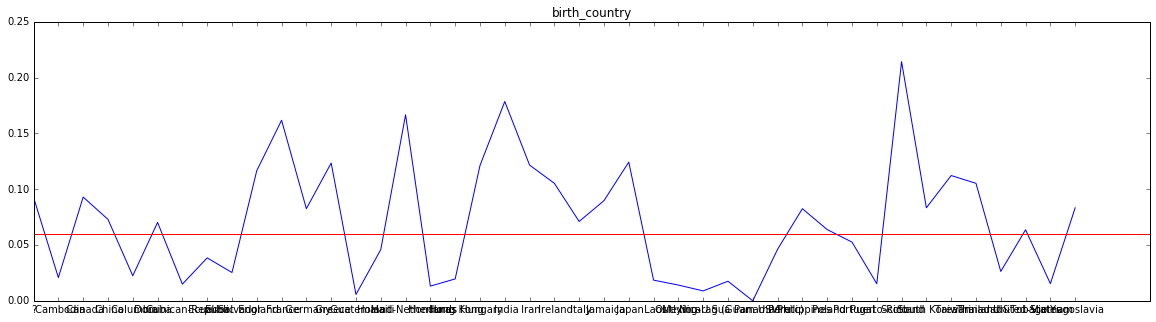

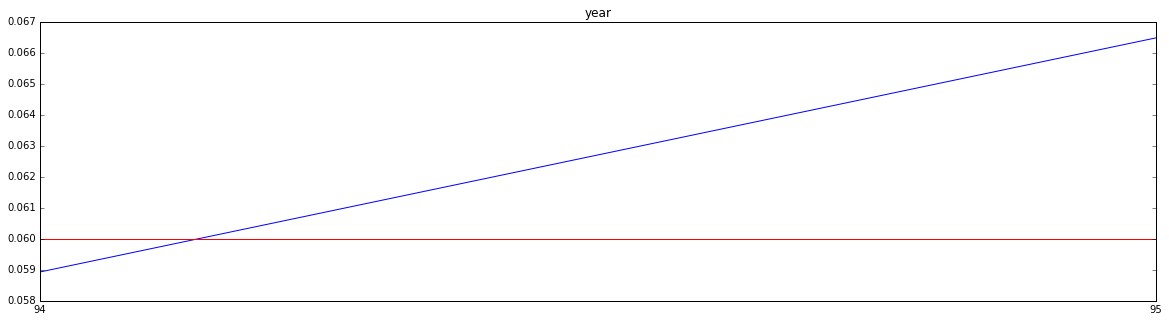

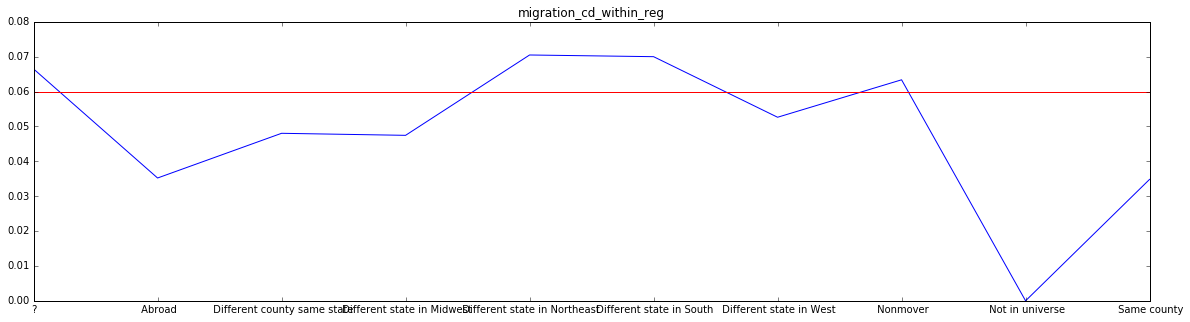

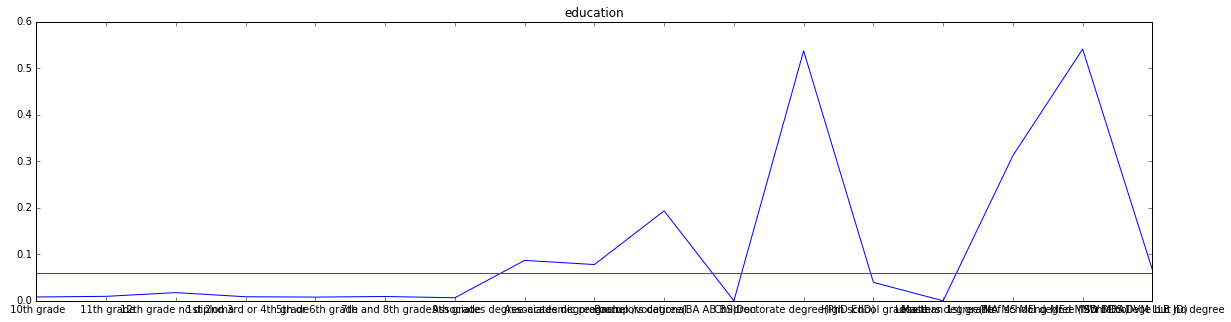

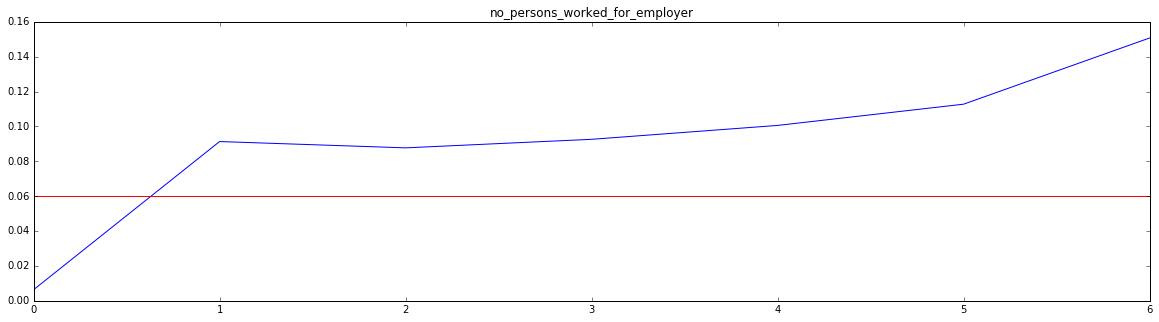

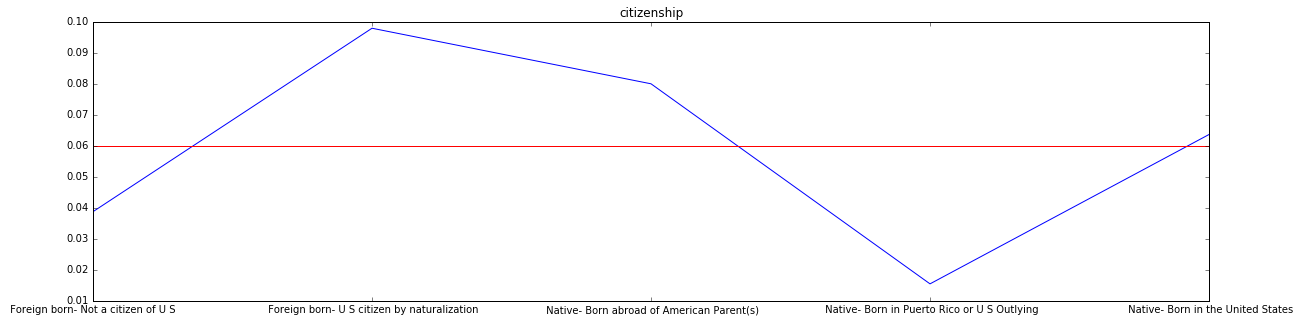

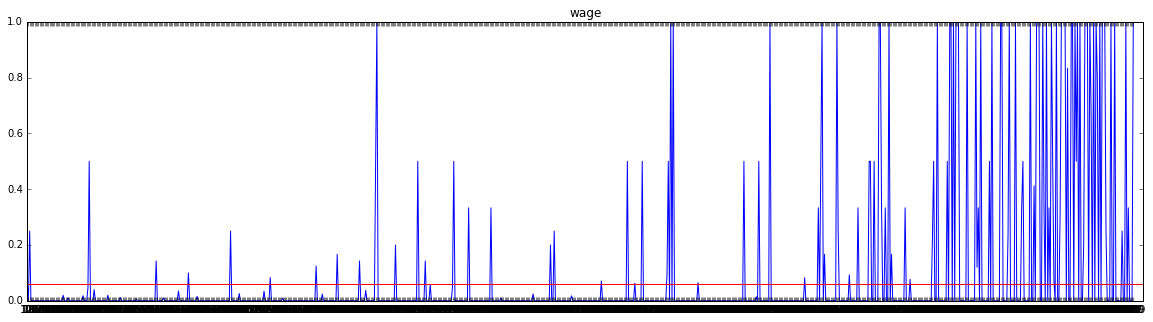

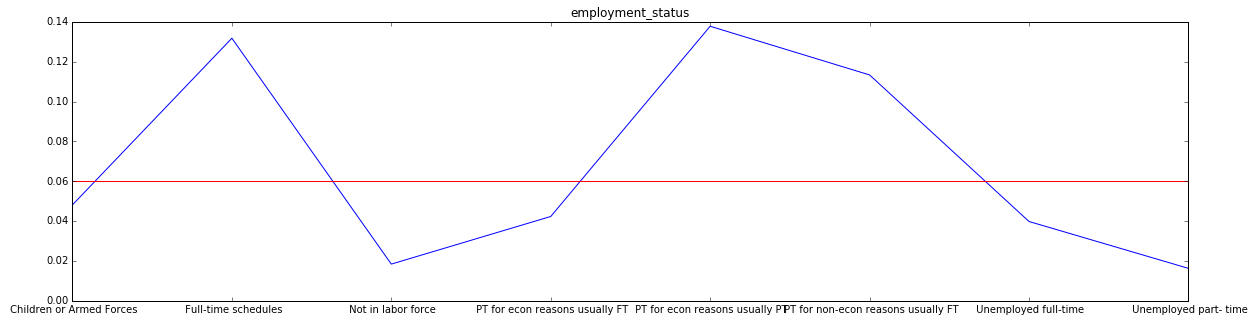

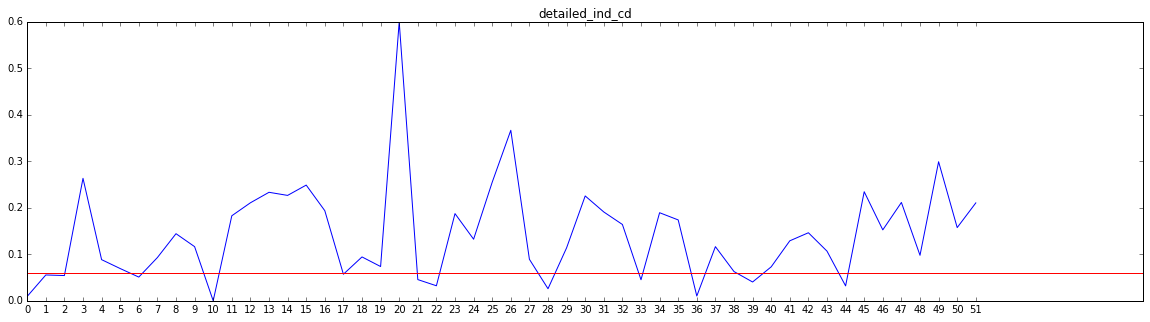

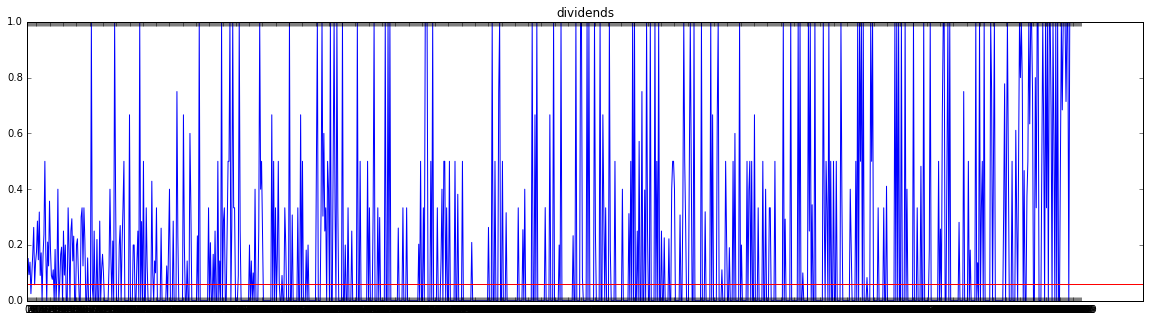

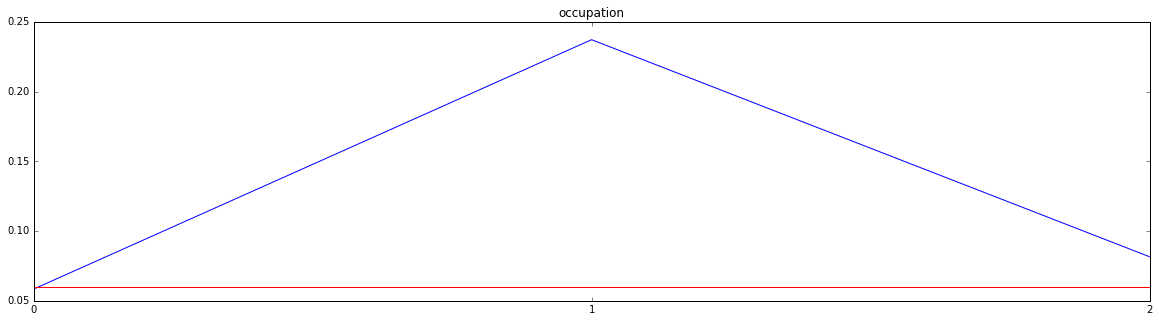

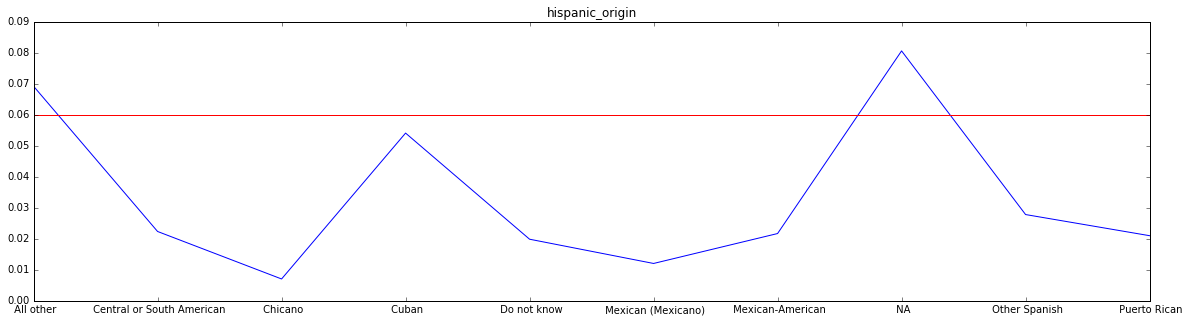

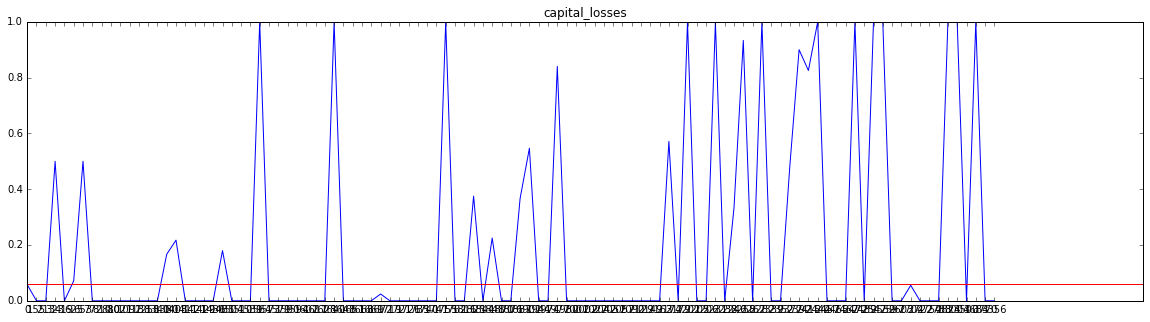

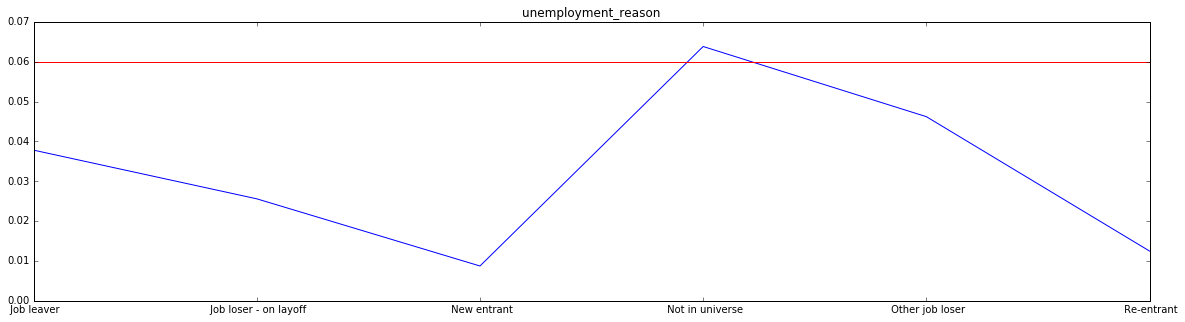

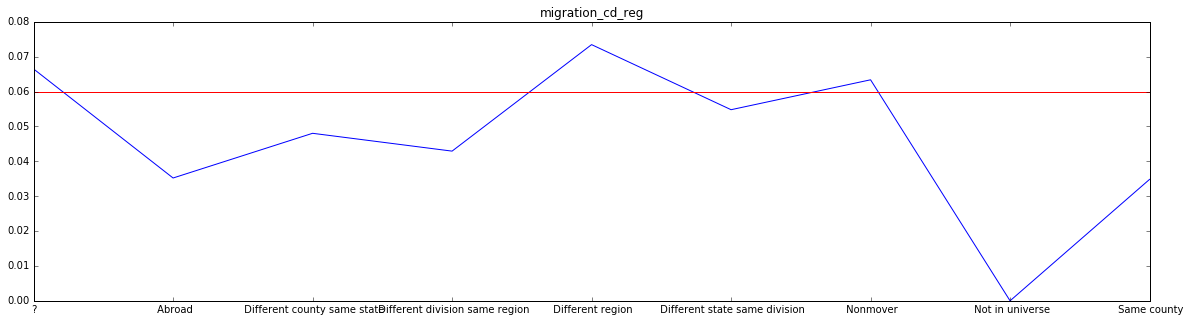

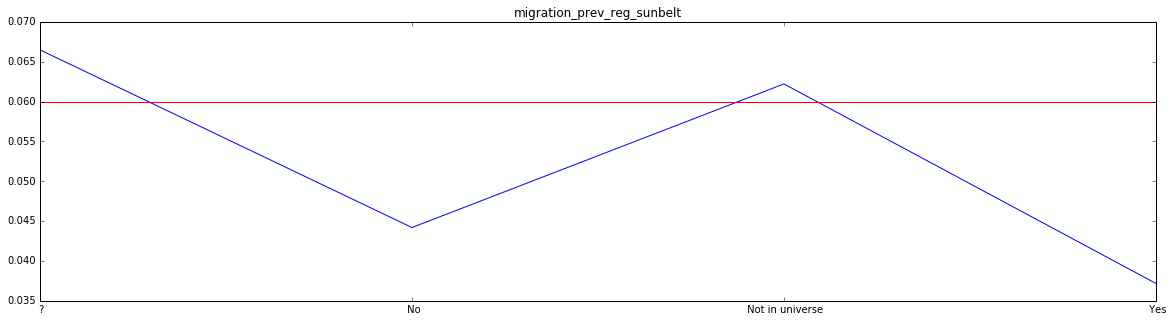

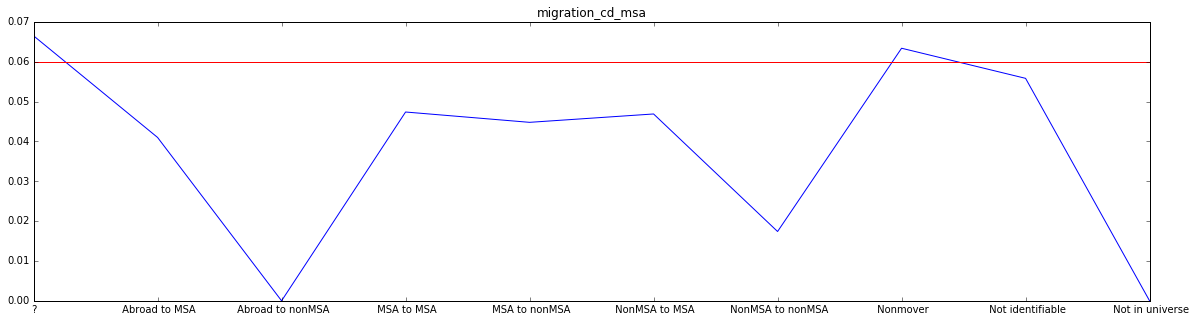

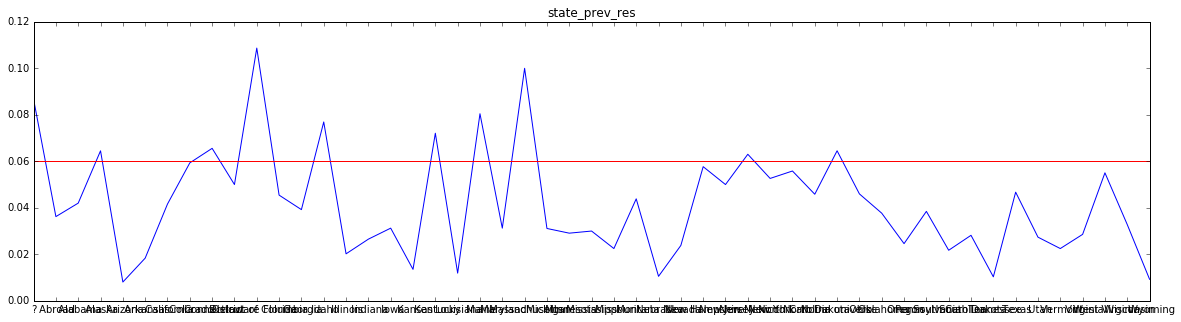

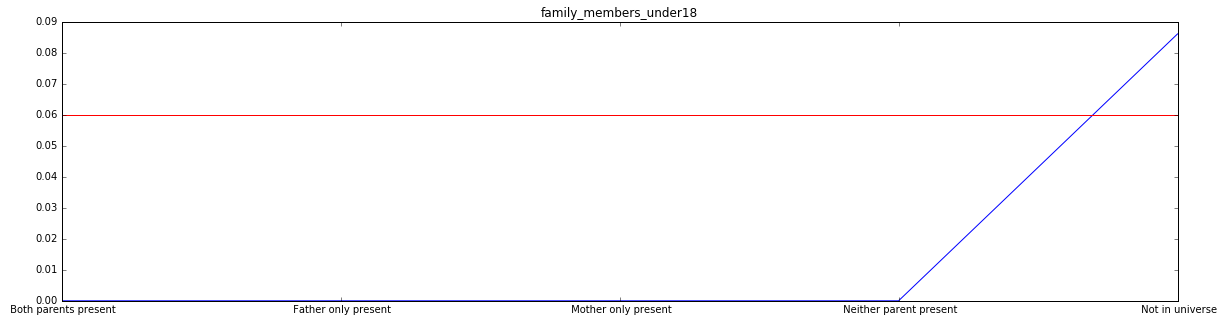

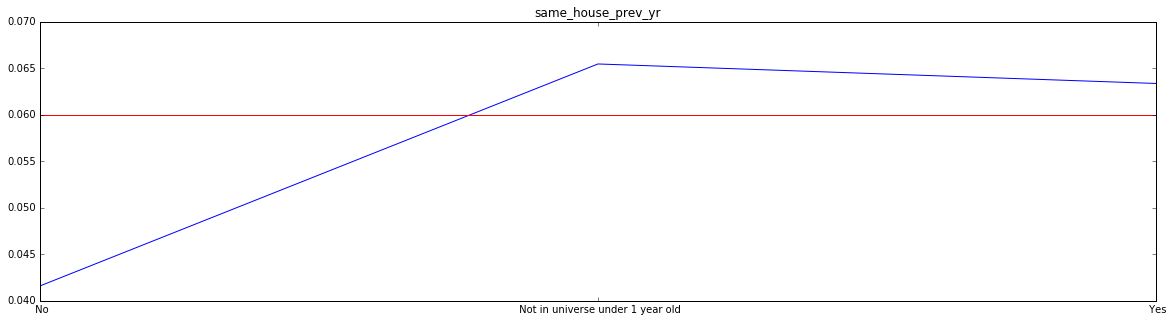

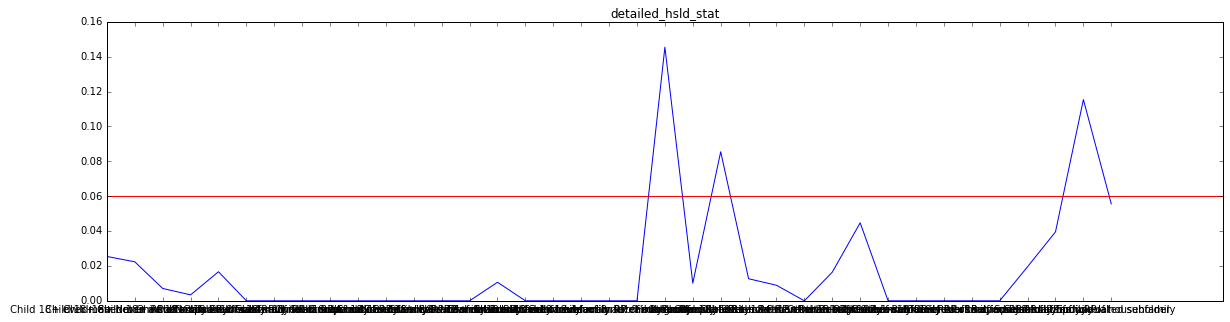

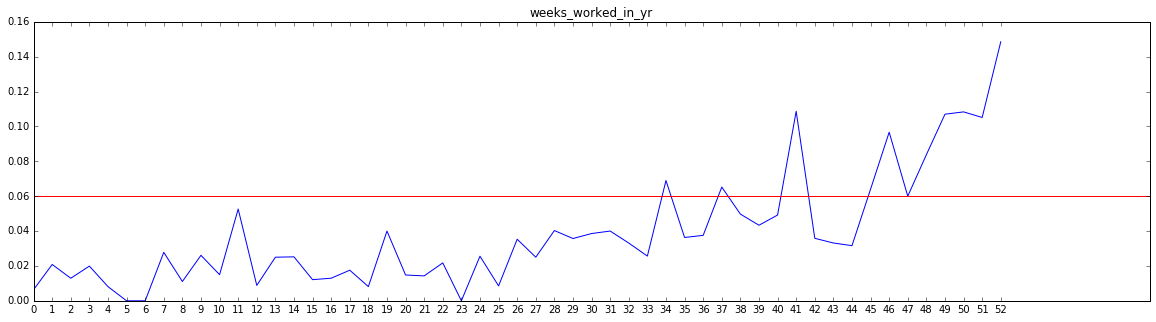

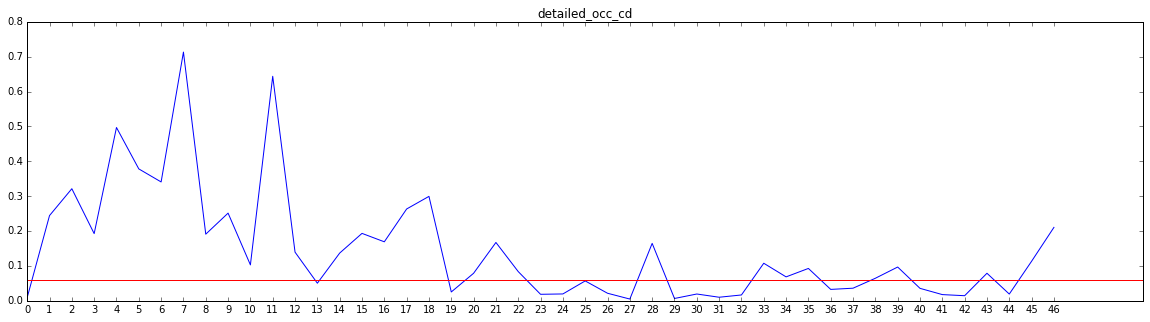

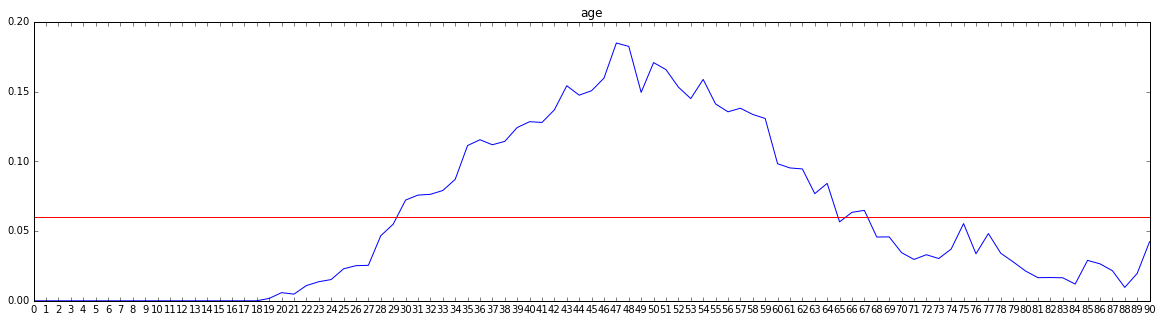

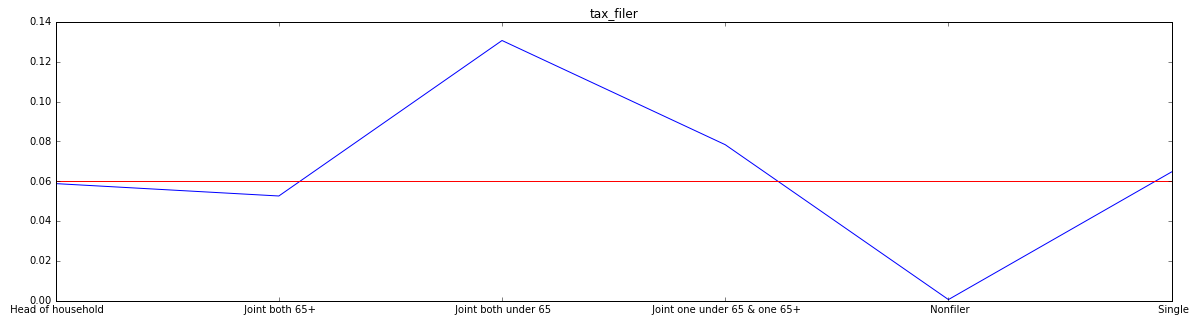

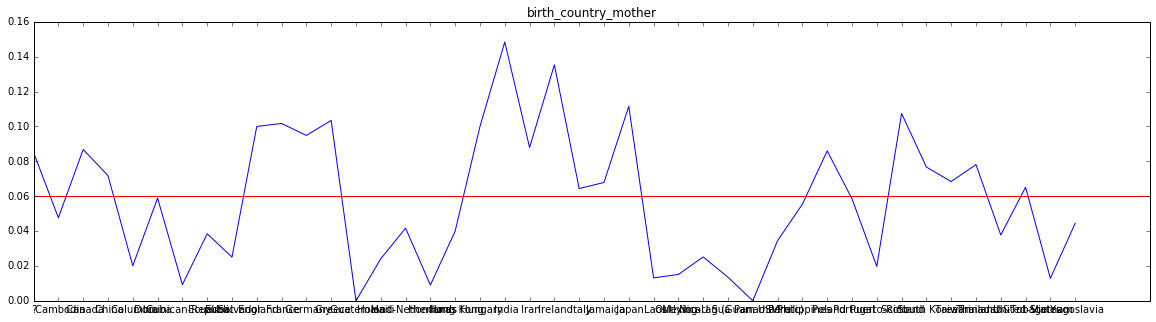

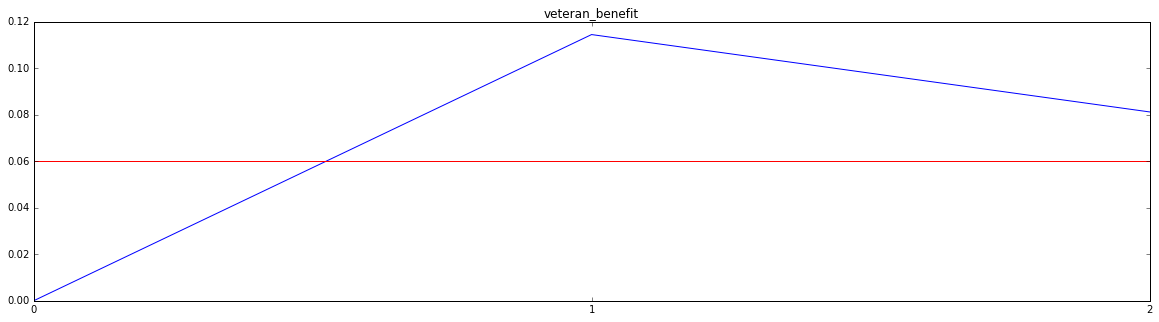

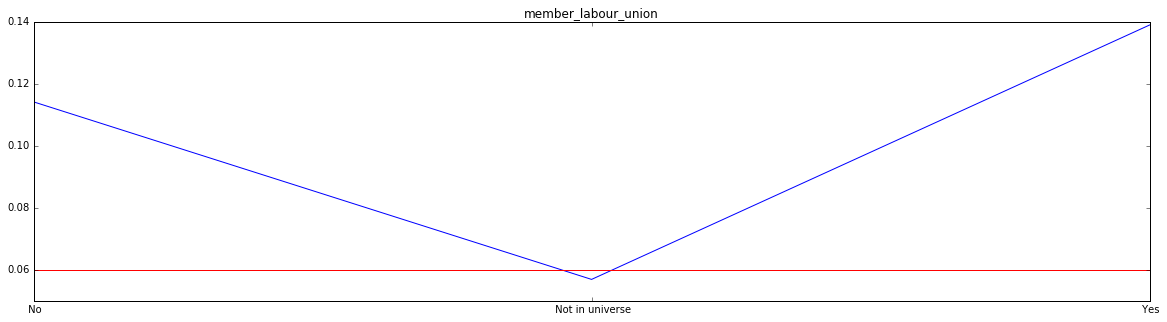

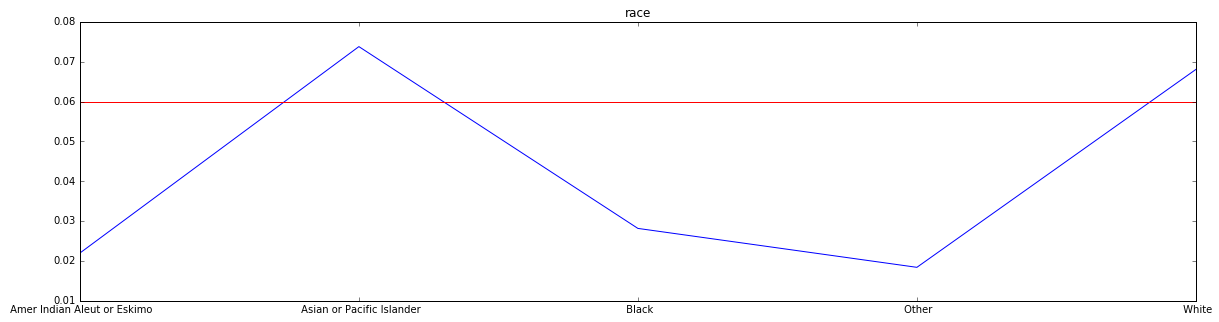

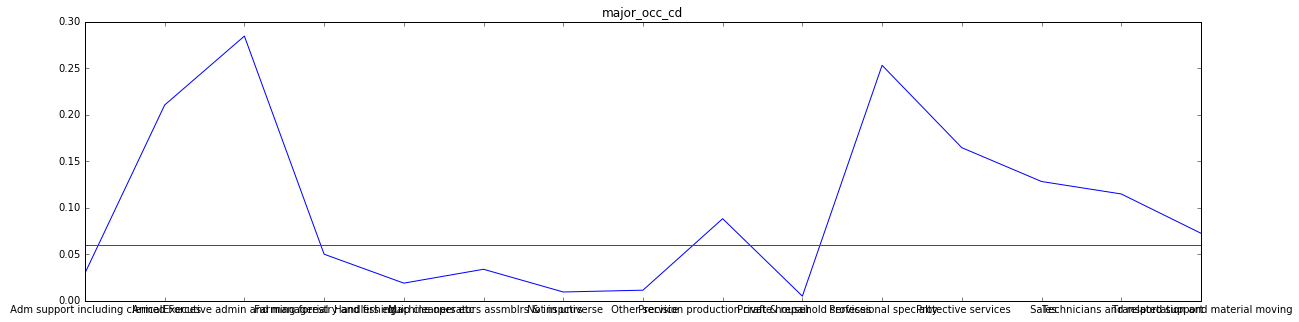

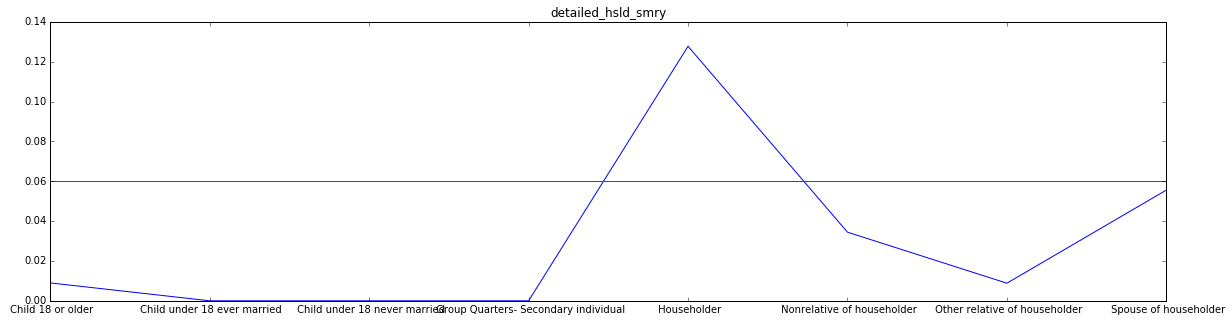

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
for cols in target_trend:
    fig=plt.figure(figsize=(20,5))
    x=range(target_trend[cols].shape[0])
    plt.plot(x,target_trend[cols]['target'])
    plt.xticks(x,target_trend[cols].index)
    plt.axhline(0.06,color='r')
    plt.title(cols)
    plt.show(fig)

In [66]:
pd.DataFrame(data1.groupby(['occupation','employment_status'])['occupation'].count())

occupation
occupation employment_status                              
0           Children or Armed Forces                 56810
            Full-time schedules                      16701
            Not in labor force                       13164
            PT for econ reasons usually FT             195
            PT for econ reasons usually PT             525
            PT for non-econ reasons usually FT        1334
            Unemployed full-time                       945
            Unemployed part- time                      348
1           Children or Armed Forces                   618
            Full-time schedules                        601
            Not in labor force                          19
            PT for econ reasons usually FT              12
            PT for econ reasons usually PT              19
            PT for non-econ reasons usually FT          47
            Unemployed full-time                        21
            Unemployed part- time                        8
2           Children or Armed Forces                  4065
            Full-time schedules                       3168
            Not in labor force                         284
            PT for econ reasons usually FT              53
            PT for econ reasons usually PT              73
            PT for non-econ reasons usually FT         269
            Unemployed full-time                       190
            Unemployed part- time                       74

In [134]:
data1.to_csv("C:\\Users\\thp029\\ct16_cap1_ds7\\project_2\\data\\ad_placement\\train1.csv",sep=',')

In [15]:
def clean_data(data1):
    data1['region_prev_res_1']=np.where(data1['region_prev_res']=='Not in universe',1,0)
    data1['marital_status_1']=np.where(data1['marital_status']=='Married-civilian spouse present',1,0)
    data1['marital_status_2']=np.where(data1['marital_status'].isin(['Divorced','Married-spouse absent']),1,0)
    data1['worker_class_1']=np.where(data1['worker_class']=='Federal government',1,0)
    data1['worker_class_2']=np.where(data1['worker_class']=='Self-employed-incorporated',1,0)
    data1['worker_class_3']=np.where(data1['worker_class'].isin(['State government','Local government','Private','Self-employed-not incorporated']),1,0)
    data1['fill_inc_question_veteran_admin_1']=np.where(data1['fill_inc_question_veteran_admin']=='No',1,0)
    data1['sex_1']=np.where(data1['sex']=='Male',1,0)
    data1['enrolled_last_wk_1']=np.where(data1['enrolled_last_wk']=='Not in universe',1,0)
    data1['citizenship_1']=np.where(data1['citizenship'].isin(['Foreign born- Not a citizen of U S','Native- Born in Pureto Rico or U S Outlying']),0,1)
    data1['employment_status_1']=np.where(data1['employment_status'].isin(['Full-time schedules','PT for econ reasons usually PT', 'PT for non-econ reasons usually FT']),1,0)
    data1['occupation_1']=np.where(data1['occupation']==1,1,0)
    data1['hispanic_origin_1']=np.where(data1['hispanic_origin'].isin(['NA','All other']),1,0)
    data1['tax_filer_1']=np.where(data1['tax_filer']=='Joint both under 65',1,0)
    data1['tax_filer_2']=np.where(data1['tax_filer'].isin(['Head of household','Single','Joint both 65+','Joint one under 65 & one 65+']),1,0)
    data1['detailed_hsld_smry_1']=np.where(data1['detailed_hsld_smry']=='Householder',1,0)
    data1['year_1']=np.where(data1['year']==95,1,0)
    data1['veteran_benefit_1']=np.where(data1['veteran_benefit']==0,0,1)
    data1['member_labour_union_1']=np.where(data1['member_labour_union']=='Not in universe',0,1)
    data1['race_1']=np.where(data1['race'].isin(['White','Asian or Pacific Islander']),1,0)
    data1['unemployment_reason_1']=np.where(data1['unemployment_reason']=='Not in universe',0,1)
    data1['family_members_under18_1']=np.where(data1['family_members_under18']=='Not in universe',0,1)
    data1['same_house_prev_yr_1']=np.where(data1['same_house_prev_yr']=='Not in universe',1,0)
    data1['capital_gains_1']=data1['capital_gains']-data1['capital_losses']
    data1['education_1']=np.where(data1['education'].isin(['Prof school degree (MD DDS DVM LLB JD)','Doctorate degree(PhD EdD)']),1,0)
    data1['education_2']=np.where(data1['education'].isin(['Masters degree(MA MS MEng MEd MSW MBA)','Bachelors degree(BA AB BS)']),1,0)
    return data1

In [13]:
testdata=pd.read_csv("C:\\Users\\thp029\\ct16_cap1_ds7\\project_2\\data\\ad_placement\\census-income-test.csv")


In [16]:
data1=clean_data(data1)
testdata=clean_data(testdata)

In [22]:
train.columns

Index([u'age', u'birth_country', u'birth_country_father',
       u'birth_country_mother', u'capital_gains', u'capital_gains_1',
       u'capital_losses', u'citizenship', u'citizenship_1',
       u'detailed_hsld_smry', u'detailed_hsld_smry_1', u'detailed_hsld_stat',
       u'detailed_ind_cd', u'detailed_occ_cd', u'dividends', u'education',
       u'education_1', u'education_2', u'employment_status',
       u'employment_status_1', u'enrolled_last_wk', u'enrolled_last_wk_1',
       u'family_members_under18', u'family_members_under18_1',
       u'fill_inc_question_veteran_admin',
       u'fill_inc_question_veteran_admin_1', u'hispanic_origin',
       u'hispanic_origin_1', u'major_ind_cd', u'major_occ_cd',
       u'marital_status', u'marital_status_1', u'marital_status_2',
       u'member_labour_union', u'member_labour_union_1', u'migration_1',
       u'migration_cd_msa', u'migration_cd_reg', u'migration_cd_within_reg',
       u'migration_prev_reg_sunbelt', u'no_persons_worked_for_employer'

In [23]:
def make_variables(data1):
    dict_df=data1.T.to_dict().values()
    for i in range(len(dict_df)):
        if dict_df[i]['migration_cd_within_reg'] in (' ?',' Nonmover'):
            dict_df[i]['migration_1']=1
        elif dict_df[i]['migration_cd_within_reg']==' Abroad':
            dict_df[i]['migration_1']=0
        elif dict_df[i]['migration_cd_within_reg']==' Different county same state':
            if dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' Not identifiable'):
                dict_df[i]['migration_1']=1
            else:
                dict_df[i]['migration_1']=0
        elif dict_df[i]['migration_cd_within_reg']==' Different state in Midwest':
            if ((dict_df[i]['migration_cd_reg']==' Different division same region')&(dict_df[i]['migration_cd_msa']==' MSA to MSA')):
                dict_df[i]['migration_1']=1
            elif ((dict_df[i]['migration_cd_reg']==' Different region')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' MSA to nonMSA'))):
                dict_df[i]['migration_1']=1
            else:
                dict_df[i]['migration_1']=0
        elif dict_df[i]['migration_cd_within_reg']==' Different state in Northeast':
            if ((dict_df[i]['migration_cd_reg']==' Different state same division')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' MSA to nonMSA'))):
                dict_df[i]['migration_1']=1
            elif ((dict_df[i]['migration_cd_reg']==' Different region')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' MSA to nonMSA',' NonMSA to MSA'))):
                dict_df[i]['migration_1']=1
            else:
                dict_df[i]['migration_1']=0
        elif dict_df[i]['migration_cd_within_reg']==' Different state in West':
            if ((dict_df[i]['migration_cd_reg']==' Different state same division')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' NonMSA to nonMSA'))):
                dict_df[i]['migration_1']=1
            elif ((dict_df[i]['migration_cd_reg']==' Different division same region')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' NonMSA to MSA',' Not identifiable'))):
                dict_df[i]['migration_1']=1
            elif ((dict_df[i]['migration_cd_reg']==' Different region')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' NonMSA to nonMSA'))):
                dict_df[i]['migration_1']=1
            else:
                dict_df[i]['migration_1']=0
        elif dict_df[i]['migration_cd_within_reg']==' Different state in South':
            if ((dict_df[i]['migration_cd_reg']==' Different state same division')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' NonMSA to nonMSA',' NonMSA to MSA'))):
                dict_df[i]['migration_1']=1
            elif ((dict_df[i]['migration_cd_reg']==' Different division same region')&(dict_df[i]['migration_cd_msa']==' MSA to MSA')):
                dict_df[i]['migration_1']=1
            elif ((dict_df[i]['migration_cd_reg']==' Different region')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' MSA to nonMSA',' NonMSA to MSA',' Not identifiable'))):
                dict_df[i]['migration_1']=1
            else:
                dict_df[i]['migration_1']=0
        elif dict_df[i]['migration_cd_within_reg']==' Same country':
            if dict_df[i]['migration_cd_msa'] in (' MSA to nonMSA',' Not identifiable'):
                dict_df[i]['migration_1']=1
            else:
                dict_df[i]['migration_1']=0
        else:
            dict_df[i]['migration_1']=0
        df=pd.DataFrame(dict_df)
        return df

In [27]:
dict_df=data1.T.to_dict().values()


[{'age': 23L,
  'birth_country': ' Mexico',
  'birth_country_father': ' Dominican-Republic',
  'birth_country_mother': ' Dominican-Republic',
  'capital_gains': 0L,
  'capital_gains_1': 0L,
  'capital_losses': 0L,
  'citizenship': ' Foreign born- Not a citizen of U S ',
  'citizenship_1': 1,
  'detailed_hsld_smry': ' Other relative of householder',
  'detailed_hsld_smry_1': 0,
  'detailed_hsld_stat': ' Other Rel 18+ ever marr RP of subfamily',
  'detailed_ind_cd': 6L,
  'detailed_occ_cd': 38L,
  'dividends': 0L,
  'education': ' 5th or 6th grade',
  'education_1': 0,
  'education_2': 0,
  'employment_status': ' Children or Armed Forces',
  'employment_status_1': 0,
  'enrolled_last_wk': ' Not in universe',
  'enrolled_last_wk_1': 0,
  'family_members_under18': ' Not in universe',
  'family_members_under18_1': 1,
  'fill_inc_question_veteran_admin': ' Not in universe',
  'fill_inc_question_veteran_admin_1': 0,
  'hispanic_origin': ' Mexican (Mexicano)',
  'hispanic_origin_1': 0,
  'majo

In [29]:
dict_df[0]['migration_cd_msa']

' MSA to MSA'

In [ ]:

def make_variables(data1):
    dict_df=data1.T.to_dict().values()
    for i in range(len(dict_df)):
        if dict_df[i]['migration_cd_within_reg'] in (' ?',' Nonmover'):
            dict_df[i]['migration_1']=1
        elif dict_df[i]['migration_cd_within_reg']==' Abroad':
            dict_df[i]['migration_1']=0
        elif dict_df[i]['migration_cd_within_reg']==' Different county same state':
            if dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' Not identifiable'):
                dict_df[i]['migration_1']=1
            else:
                dict_df[i]['migration_1']=0
        elif dict_df[i]['migration_cd_within_reg']==' Different state in Midwest':
            if ((dict_df[i]['migration_cd_reg']==' Different division same region')&(dict_df[i]['migration_cd_msa']==' MSA to MSA')):
                dict_df[i]['migration_1']=1
            elif ((dict_df[i]['migration_cd_reg']==' Different region')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' MSA to nonMSA'))):
                dict_df[i]['migration_1']=1
            else:
                dict_df[i]['migration_1']=0
        elif dict_df[i]['migration_cd_within_reg']==' Different state in Northeast':
            if ((dict_df[i]['migration_cd_reg']==' Different state same division')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' MSA to nonMSA'))):
                dict_df[i]['migration_1']=1
            elif ((dict_df[i]['migration_cd_reg']==' Different region')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' MSA to nonMSA',' NonMSA to MSA'))):
                dict_df[i]['migration_1']=1
            else:
                dict_df[i]['migration_1']=0
        elif dict_df[i]['migration_cd_within_reg']==' Different state in West':
            if ((dict_df[i]['migration_cd_reg']==' Different state same division')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' NonMSA to nonMSA'))):
                dict_df[i]['migration_1']=1
            elif ((dict_df[i]['migration_cd_reg']==' Different division same region')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' NonMSA to MSA',' Not identifiable'))):
                dict_df[i]['migration_1']=1
            elif ((dict_df[i]['migration_cd_reg']==' Different region')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' NonMSA to nonMSA'))):
                dict_df[i]['migration_1']=1
            else:
                dict_df[i]['migration_1']=0
        elif dict_df[i]['migration_cd_within_reg']==' Different state in South':
            if ((dict_df[i]['migration_cd_reg']==' Different state same division')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' NonMSA to nonMSA',' NonMSA to MSA'))):
                dict_df[i]['migration_1']=1
            elif ((dict_df[i]['migration_cd_reg']==' Different division same region')&(dict_df[i]['migration_cd_msa']==' MSA to MSA')):
                dict_df[i]['migration_1']=1
            elif ((dict_df[i]['migration_cd_reg']==' Different region')&(dict_df[i]['migration_cd_msa'] in (' MSA to MSA',' MSA to nonMSA',' NonMSA to MSA',' Not identifiable'))):
                dict_df[i]['migration_1']=1
            else:
                dict_df[i]['migration_1']=0
        elif dict_df[i]['migration_cd_within_reg']==' Same country':
            if dict_df[i]['migration_cd_msa'] in (' MSA to nonMSA',' Not identifiable'):
                dict_df[i]['migration_1']=1
            else:
                dict_df[i]['migration_1']=0
        else:
            dict_df[i]['migration_1']=0
        df=pd.DataFrame(dict_df)
        return df

In [109]:
y_train=data1['target']

X_train=data1[['detailed_hsld_smry_1','region_prev_res_1','marital_status_1','marital_status_2','worker_class_1','worker_class_2',
               'worker_class_3','age','wage','dividends','no_persons_worked_for_employer','weeks_worked_in_yr',
        'fill_inc_question_veteran_admin_1','sex_1','enrolled_last_wk_1','citizenship_1','employment_status_1','occupation_1',
        'hispanic_origin_1','tax_filer_1','tax_filer_2','year_1','veteran_benefit_1','member_labour_union_1',
        'race_1','unemployment_reason_1','family_members_under18_1','same_house_prev_yr_1','capital_gains_1','education_1','education_2']]
X_train.head()

detailed_hsld_smry_1  region_prev_res_1  marital_status_1  \
0                     0                  0                 0   
1                     0                  0                 0   
2                     0                  0                 0   
3                     0                  0                 0   
4                     0                  0                 0   

   marital_status_2  worker_class_1  worker_class_2  worker_class_3  age  \
0                 0               0               0               0   23   
1                 0               0               0               0   45   
2                 0               0               0               0   11   
3                 0               0               0               0    4   
4                 0               0               0               0   68   

   wage  dividends     ...       year_1  veteran_benefit_1  \
0     0          0     ...            0                  1   
1     0          0     ...            1                  1   
2     0          0     ...            1                  0   
3     0          0     ...            1                  0   
4   475         60     ...            0                  1   

   member_labour_union_1  race_1  unemployment_reason_1  \
0                      1       0                      1   
1                      1       0                      1   
2                      1       0                      1   
3                      1       0                      1   
4                      1       0                      1   

   family_members_under18_1  same_house_prev_yr_1  capital_gains_1  \
0                         1                     0                0   
1                         1                     0                0   
2                         1                     0                0   
3                         1                     0                0   
4                         1                     0                0   

   education_1  education_2  
0            0            0  
1            0            0  
2            0            0  
3            0            0  
4            0            0  

[5 rows x 31 columns]

In [93]:
testdata=pd.read_csv("C:\\Users\\thp029\\ct16_cap1_ds7\\project_2\\data\\ad_placement\\census-income-test.csv")

In [105]:
testdata=clean_data(testdata)

In [18]:
testdata['target']=testdata['target'].replace('-50000',0)
testdata['target']=testdata['target'].replace(' 50000+.',1)
testdata['target'].value_counts()

0    93576
1     6186
Name: target, dtype: int64

In [ ]:
X_train=data1.drop(['worker_class', 'detailed_ind_cd', 'detailed_occ_cd',
       'education', u'enrolled_last_wk', u'marital_status',
       u'major_ind_cd', u'major_occ_cd', u'race', u'hispanic_origin', u'sex',
       u'member_labour_union', u'unemployment_reason', u'employment_status',
       u'capital_gains', u'capital_losses',  u'tax_filer',
       u'region_prev_res', u'state_prev_res', u'detailed_hsld_stat',
       u'detailed_hsld_smry', u'weight', u'migration_cd_msa',
       u'migration_cd_reg', u'migration_cd_within_reg', u'same_house_prev_yr',
       u'migration_prev_reg_sunbelt', 
       u'family_members_under18', u'birth_country_father',
       u'birth_country_mother', u'birth_country', u'citizenship',
       u'occupation', u'fill_inc_question_veteran_admin', u'veteran_benefit',
       , u'year', u'target', ],)

In [120]:
y_train=data1['target']
X_train=data1[['detailed_hsld_smry_1','region_prev_res_1','marital_status_1','marital_status_2','worker_class_1','worker_class_2',
               'worker_class_3','age','wage','dividends','no_persons_worked_for_employer','weeks_worked_in_yr',
        'fill_inc_question_veteran_admin_1','sex_1','enrolled_last_wk_1','citizenship_1','employment_status_1','occupation_1',
        'hispanic_origin_1','tax_filer_1','tax_filer_2','year_1','veteran_benefit_1','member_labour_union_1',
        'race_1','unemployment_reason_1','family_members_under18_1','same_house_prev_yr_1','capital_gains_1','education_1','education_2']]
y_test=testdata['target']
X_test=testdata[['detailed_hsld_smry_1','region_prev_res_1','marital_status_1','marital_status_2','worker_class_1','worker_class_2',
               'worker_class_3','age','wage','dividends','no_persons_worked_for_employer','weeks_worked_in_yr',
        'fill_inc_question_veteran_admin_1','sex_1','enrolled_last_wk_1','citizenship_1','employment_status_1','occupation_1',
        'hispanic_origin_1','tax_filer_1','tax_filer_2','year_1','veteran_benefit_1','member_labour_union_1',
        'race_1','unemployment_reason_1','family_members_under18_1','same_house_prev_yr_1','capital_gains_1','education_1','education_2']]


In [121]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=sklearn.linear_model.LogisticRegression()
model.fit(X_train,y_train)
y_predict_logistic=model.predict(X_test)
accuracy_logistic=accuracy_score(y_test, y_predict_logistic)

In [122]:
accuracy_logistic

0.94284396864537601

In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_model_accuracy=[]
for i in range(20):
    model=KNeighborsClassifier(n_neighbors=i+1)
    model_fit=model.fit(X_train,y_train)
    y_predict_knn=model.predict(X_test)
    knn_model_accuracy.append(accuracy_score(y_test, y_predict_knn))
    print str(i+1)+" Accuracy= "+str(knn_model_accuracy[i])
knn_model_accuracy

1 Accuracy= 0.921022032437
2 Accuracy= 0.943866402037
3 Accuracy= 0.941530843407
4 Accuracy= 0.946452557086
5 Accuracy= 0.944157093883
6 Accuracy= 0.946071650528
7 Accuracy= 0.946011507388
8 Accuracy= 0.946893606784
9 Accuracy= 0.946312223091
10 Accuracy= 0.946803392073
11 Accuracy= 0.946773320503
12 Accuracy= 0.947214370201
13 Accuracy= 0.947104107777
14 Accuracy= 0.947645396043
15 Accuracy= 0.947474990477
16 Accuracy= 0.947635372186
17 Accuracy= 0.947525109761
18 Accuracy= 0.947835849321
19 Accuracy= 0.947835849321
20 Accuracy= 0.948066398027


[0.92102203243720049,
 0.94386640203684768,
 0.94153084340730941,
 0.9464525570858644,
 0.9441570938834426,
 0.94607165052825726,
 0.94601150738758244,
 0.94689360678414625,
 0.94631222309095653,
 0.94680339207313402,
 0.94677332050279661,
 0.94721437020107857,
 0.94710410777650811,
 0.94764539604258136,
 0.94747499047733608,
 0.94763537218580218,
 0.94752510976123172,
 0.94783584932138487,
 0.94783584932138487,
 0.94806639802730497]

In [129]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

In [132]:
formula='target ~ '
for i in range(len(X_train.columns)):
    formula=formula+"+"+X_train.columns[i]
formula

'target ~ +detailed_hsld_smry_1+region_prev_res_1+marital_status_1+marital_status_2+worker_class_1+worker_class_2+worker_class_3+age+wage+dividends+no_persons_worked_for_employer+weeks_worked_in_yr+fill_inc_question_veteran_admin_1+sex_1+enrolled_last_wk_1+citizenship_1+employment_status_1+occupation_1+hispanic_origin_1+tax_filer_1+tax_filer_2+year_1+veteran_benefit_1+member_labour_union_1+race_1+unemployment_reason_1+family_members_under18_1+same_house_prev_yr_1+capital_gains_1+education_1+education_2'

In [133]:
logistic_model=logit(formula,data1).fit()

Optimization terminated successfully.
         Current function value: 0.168445
         Iterations 30


LinAlgError: Singular matrix

In [24]:
train=make_variables(data1)

In [26]:
train['migration_1']

0        0.0
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
        ... 
99513    NaN
99514    NaN
99515    NaN
99516    NaN
99517    NaN
99518    NaN
99519    NaN
99520    NaN
99521    NaN
99522    NaN
99523    NaN
99524    NaN
99525    NaN
99526    NaN
99527    NaN
99528    NaN
99529    NaN
99530    NaN
99531    NaN
99532    NaN
99533    NaN
99534    NaN
99535    NaN
99536    NaN
99537    NaN
99538    NaN
99539    NaN
99540    NaN
99541    NaN
99542    NaN
Name: migration_1, dtype: float64

In [144]:
test=make_variables(testdata)

In [145]:
def allot(rank_lkup, x):
    if x <= rank_lkup.iloc[1,0]:
        return 'D'
    elif x <= rank_lkup.iloc[2,0]:
        return 'C'   
    elif x <= rank_lkup.iloc[3,0]:
        return 'B'
    else:
        return 'A'

In [146]:
def quartile(source_df, col_name, target_col_name):
    hit_rate_df=pd.DataFrame(source_df[[col_name,target_col_name]].groupby(col_name).mean())
    hit_rate_df.rename(columns={target_col_name: 'hit_ratio'}, inplace=True)
    rank_lkup=pd.DataFrame(np.percentile(hit_rate_df['hit_ratio'], [0, 25, 50, 75, 100]))
    hit_rate_df['target_tier']= hit_rate_df['hit_ratio'].map(lambda x: allot(rank_lkup,x))
    results_df = pd.merge(source_df, hit_rate_df, left_on=col_name, right_index=True, how='left', sort=False);
    results_df.drop('hit_ratio', axis=1, inplace=True)
    final_df = pd.concat([results_df, pd.get_dummies(results_df['target_tier'], prefix=col_name)], axis=1)
    final_df.drop('target_tier', axis=1, inplace=True)
    return final_df

In [147]:
train1=quartile(train,'detailed_occ_cd', 'target')
test1=quartile(test,'detailed_occ_cd', 'target')
train=quartile(train1,'detailed_ind_cd', 'target')
test=quartile(test1,'detailed_ind_cd', 'target')

In [151]:
test.head()

age   birth_country birth_country_father birth_country_mother  \
0   38          Mexico               Mexico               Mexico   
1   44   United-States        United-States        United-States   
2    2   United-States        United-States        United-States   
3   35   United-States        United-States        United-States   
4   49   United-States        United-States        United-States   

   capital_gains  capital_gains_1  capital_losses  \
0              0                0               0   
1              0                0               0   
2              0                0               0   
3              0                0               0   
4              0                0               0   

                            citizenship  citizenship_1  \
0   Foreign born- Not a citizen of U S               1   
1     Native- Born in the United States              1   
2     Native- Born in the United States              1   
3     Native- Born in the United States              1   
4     Native- Born in the United States              1   

              detailed_hsld_smry        ...          year year_1  \
0          Spouse of householder        ...            95      1   
1          Spouse of householder        ...            95      1   
2   Child under 18 never married        ...            95      1   
3                    Householder        ...            94      0   
4     Nonrelative of householder        ...            95      1   

   detailed_occ_cd_A  detailed_occ_cd_B  detailed_occ_cd_C detailed_occ_cd_D  \
0                0.0                0.0                1.0               0.0   
1                0.0                1.0                0.0               0.0   
2                0.0                0.0                0.0               1.0   
3                1.0                0.0                0.0               0.0   
4                0.0                0.0                1.0               0.0   

   detailed_ind_cd_A  detailed_ind_cd_B detailed_ind_cd_C  detailed_ind_cd_D  
0                0.0                0.0               0.0                1.0  
1                0.0                1.0               0.0                0.0  
2                0.0                0.0               0.0                1.0  
3                0.0                1.0               0.0                0.0  
4                0.0                0.0               1.0                0.0  

[5 rows x 77 columns]

In [152]:
train.to_csv("C:\\Users\\thp029\\Project big data\\train.csv",sep=',')
test.to_csv("C:\\Users\\thp029\\Project big data\\test.csv",sep=',')

In [153]:
len(train)

99543

In [154]:
len(test)

99762

In [ ]:
data=pd.read_csv("C:\\Users\\thp029\\Project big data\\test.csv",sep=',')